# MODELLING
## Logistic Regression with Tensorflow Keras
### Fraud Detection System Development using Deep Neural Network for Reported Transactional Data

#### Import Libraries and Dataset

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv('user_data_source_dropped.csv', sep = ';')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,is_scammer,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,...,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA,uid
0,0,0,1,0.376934,0.005629,0.673512,0.909517,1,0.019455,0.456958,...,0,0,0,0,1,0,0,0,0,a265c05d-6ed6-4991-971e-6ffab1074379
1,1,1,0,0.552039,0.632270,0.784524,0.948204,1,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,4d6ebe72-f050-49fd-82fe-a8764bb7a1a2
2,2,2,0,0.772855,0.696998,0.783631,0.766422,1,0.077821,0.324991,...,0,0,0,0,0,0,0,0,1,08744e6e-fec5-4168-bf38-68438dec2f88
3,3,3,0,0.535865,0.550657,0.565476,0.974102,1,0.042802,0.200904,...,0,0,0,0,1,0,0,0,0,f2a873e9-1e28-4db6-9652-cede968ab5d5
4,4,4,0,0.786920,0.715760,0.999702,0.688586,1,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,c78d7429-7173-4c60-b911-dd8b10246baa


In [5]:
# df = df.rename(columns={"Unnamed: 0": "id"})
df = df.drop(columns = ['uid', 'Unnamed: 0.1', 'Unnamed: 0'])
df.head()

,is_scammer,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,aqc_freq_topup,aqc_freq_topup_within_7d,...,gender_Male,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA
0,1,0.376934,0.005629,0.673512,0.909517,1,0.019455,0.456958,0.022750,0.007009,...,0,0,0,0,0,1,0,0,0,0
1,0,0.552039,0.632270,0.784524,0.948204,1,0.000000,0.000000,0.038576,0.074766,...,1,0,0,0,0,1,0,0,0,0
2,0,0.772855,0.696998,0.783631,0.766422,1,0.077821,0.324991,0.683482,0.271028,...,1,0,0,0,0,0,0,0,0,1
3,0,0.535865,0.550657,0.565476,0.974102,1,0.042802,0.200904,0.092977,0.042056,...,0,0,0,0,0,1,0,0,0,0
4,0,0.786920,0.715760,0.999702,0.688586,1,0.000000,0.000000,0.031652,0.056075,...,1,0,0,0,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40717 entries, 0 to 40716
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   is_scammer                       40717 non-null  int64  
 1   trx_date                         40717 non-null  float64
 2   report_date                      40717 non-null  float64
 3   registereddate                   40717 non-null  float64
 4   birthday                         40717 non-null  float64
 5   is_verified                      40717 non-null  int64  
 6   aqc_freq_prepaid_mobile          40717 non-null  float64
 7   aqc_mean_prepaid_mobile_amount   40717 non-null  float64
 8   aqc_freq_topup                   40717 non-null  float64
 9   aqc_freq_topup_within_7d         40717 non-null  float64
 10  aqc_mean_topup_amount            40717 non-null  float64
 11  aqc_mean_topup_amount_7d         40717 non-null  float64
 12  aqc_mean_topup_amo

#### Dataset Splitting and Shuffling

In [7]:
# Split Train and Validation Dataset
#from sklearn.model_selection import train_test_split
SPLIT_SIZE = 0.7368421

train_len = int(len(df) * SPLIT_SIZE)

shuffled_files = df.sample(frac = 1, random_state = 1)

test_set = shuffled_files[train_len:]
train_set = shuffled_files[:train_len]

y_train = train_set['is_scammer']
x_train = train_set.drop(columns=['is_scammer'])
y_test = test_set['is_scammer']
x_test = test_set.drop(columns=['is_scammer'])

In [8]:
# Convert to tensors
x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

In [9]:
x_train.shape

TensorShape([30001, 51])

#### Modelling

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_dim=x_train.shape[1]), #Try & Error Hyperparameter
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [26]:
# Main Metrics: F1, precision
# Complementary Metrics: 

In [27]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.Precision(), 
        tf.keras.metrics.Recall() 
#         tf.keras.metrics.FalseNegatives(),
#         tf.keras.metrics.FalsePositives(),
#         tf.keras.metrics.TruePositives(),
#         tf.keras.metrics.TrueNegatives()
    ]
)

In [28]:
epoch_count = 50

history = model.fit(
    x_train, 
    y_train, 
    epochs=epoch_count, 
    validation_data=(x_test, y_test) 
#     callbacks=[metrics]
)

Epoch 1/50
938/938 [==============================] - 2s 2ms/step - loss: 0.5388 - binary_accuracy: 0.7384 - precision_1: 0.7595 - recall_1: 0.6877 - val_loss: 0.4510 - val_binary_accuracy: 0.7946 - val_precision_1: 0.8083 - val_recall_1: 0.7604
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.4569 - binary_accuracy: 0.7918 - precision_1: 0.8113 - recall_1: 0.7536 - val_loss: 0.4153 - val_binary_accuracy: 0.8108 - val_precision_1: 0.7951 - val_recall_1: 0.8258
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.4288 - binary_accuracy: 0.8089 - precision_1: 0.8377 - recall_1: 0.7600 - val_loss: 0.3914 - val_binary_accuracy: 0.8225 - val_precision_1: 0.8553 - val_recall_1: 0.7668
Epoch 4/50
938/938 [==============================] - 1s 2ms/step - loss: 0.4131 - binary_accuracy: 0.8186 - precision_1: 0.8487 - recall_1: 0.7698 - val_loss: 0.3855 - val_binary_accuracy: 0.8242 - val_precision_1: 0.8187 - val_recall_1: 0.8227
Epoch 5/50
938/9

Epoch 34/50
938/938 [==============================] - 2s 2ms/step - loss: 0.3298 - binary_accuracy: 0.8584 - precision_1: 0.8904 - recall_1: 0.8133 - val_loss: 0.3607 - val_binary_accuracy: 0.8447 - val_precision_1: 0.8798 - val_recall_1: 0.7905
Epoch 35/50
938/938 [==============================] - 2s 2ms/step - loss: 0.3282 - binary_accuracy: 0.8597 - precision_1: 0.8900 - recall_1: 0.8166 - val_loss: 0.3678 - val_binary_accuracy: 0.8425 - val_precision_1: 0.8910 - val_recall_1: 0.7724
Epoch 36/50
938/938 [==============================] - 2s 2ms/step - loss: 0.3302 - binary_accuracy: 0.8580 - precision_1: 0.8879 - recall_1: 0.8153 - val_loss: 0.3673 - val_binary_accuracy: 0.8417 - val_precision_1: 0.8391 - val_recall_1: 0.8369
Epoch 37/50
938/938 [==============================] - 2s 2ms/step - loss: 0.3270 - binary_accuracy: 0.8616 - precision_1: 0.8905 - recall_1: 0.8205 - val_loss: 0.3603 - val_binary_accuracy: 0.8456 - val_precision_1: 0.8697 - val_recall_1: 0.8048
Epoch 38/50


#### Evaluation

In [29]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_binary_accuracy', 'val_precision_1', 'val_recall_1'])

In [30]:
for key in history.history.keys():
    print(str(key) + " : " + str(history.history[key][epoch_count-1]))

loss : 0.3137092590332031
binary_accuracy : 0.866004467010498
precision_1 : 0.8971508741378784
recall_1 : 0.8228780031204224
val_loss : 0.37274035811424255
val_binary_accuracy : 0.8477043509483337
val_precision_1 : 0.8603954315185547
val_recall_1 : 0.8219805359840393


In [65]:
# tr_tp = history.history['true_positives'][epoch_count-1]
# tr_tn = history.history['true_negatives'][epoch_count-1]
# tr_fp = history.history['false_positives'][epoch_count-1]
# tr_fn = history.history['false_negatives'][epoch_count-1]
# val_tp = history.history['val_true_positives'][epoch_count-1]
# val_tn = history.history['val_true_negatives'][epoch_count-1]
# val_fp = history.history['val_false_positives'][epoch_count-1]
# val_fn = history.history['val_false_negatives'][epoch_count-1]

# train_acc = (tr_tp+tr_tn)/(tr_tp+tr_tn+tr_fp+tr_fn)
# val_acc = (val_tp+val_tn)/(val_tp+val_tn+val_fp+val_fn)

# tr_prec = history.history['precision'][epoch_count-1]
# tr_recall = history.history['recall'][epoch_count-1]
# val_prec = history.history['val_precision'][epoch_count-1]
# val_recall = history.history['val_recall'][epoch_count-1]

# train_f1 = (2*tr_prec*tr_recall)/(tr_prec+tr_recall)
# val_f1 = (2*val_prec*val_recall)/(val_prec+val_recall)

In [66]:
# print("Training Accuracy: " + str(train_acc))
# print("Validation Accuracy: " + str(val_acc))
# print("Training F1 score: " + str(train_f1))
# print("Validation F1 score: " + str(val_f1))

Training Accuracy: 0.847438418719376
Validation Accuracy: 0.8450914520343412
Training F1 score: 0.8409051396020769
Validation F1 score: 0.8393340912928227


In [16]:
# import matplotlib.pyplot as plt

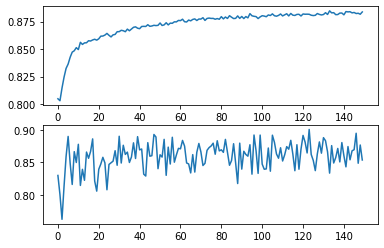

In [17]:
# plt.subplot(2,1,1)
# plt.plot(history.history['precision'])

# plt.subplot(2,1,2)
# plt.plot(history.history['val_precision'])

In [16]:
df_test = pd.read_csv("user_data_test_cleaned.csv", sep=';')

In [19]:
df_test = df_test.drop(columns=['Unnamed: 0', 'uid'])
df_test.head()

,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,aqc_freq_topup,aqc_freq_topup_within_7d,aqc_mean_topup_amount,...,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA,is_scammer
0,0.812236,0.812763,0.963095,0.916693,1,0.000000,0.000000,0.077151,0.053738,0.002067,...,0,0,0,0,1,0,0,0,0,0
1,0.800985,0.801543,1.000000,0.345767,1,0.000000,0.000000,0.015826,0.037383,0.000215,...,0,0,0,0,0,1,0,0,0,1
2,0.796765,0.797335,0.944643,0.962166,1,0.000000,0.000000,0.005935,0.004673,0.000670,...,0,0,0,0,1,0,0,0,0,0
3,0.756681,0.771388,0.872619,0.789122,1,0.038911,0.041929,0.033630,0.065421,0.002565,...,0,1,0,0,0,0,0,0,0,0
4,0.775668,0.776297,0.935714,0.886426,1,0.062257,0.195669,0.016815,0.018692,0.000502,...,0,0,0,0,0,0,0,1,0,1


In [20]:
test_ref_labels = df_test['is_scammer']
testing_set = df_test.drop(columns=['is_scammer'])

In [31]:
test_pred_res = model.predict(testing_set)
tp = 0
fp = 0
tn = 0
fn = 0
for i in range (0, len(test_pred_res)):
    if test_pred_res[i] > 0.5:
        if test_ref_labels[i] == 1:
            tp += 1
        else:
            fp += 1
    else:
        if test_ref_labels[i] == 1:
            fn += 1
        else:
            tn += 1
            
print("Test Accuracy: ", (tp+tn)/(tp+tn+fp+fn))
print("Test Precision ", tp/(tp+fn))
print("Test Recall: ", tn/(tn+fp))

Test Accuracy:  0.8352007469654529
Test Precision  0.8494031221303948
Test Recall:  0.8205128205128205


#### Save Model

In [67]:
# model.save("log_reg_keras_source_drop.h5")